In [18]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
# Make a simple linear regression model using fish.csv 
# 0. Feature Selection: 
#  How can you evaluate and select the most appropriate feature(s) from Fish.csv for 
# your single linear regression model to predict the weight of fish? 
# 1. Data Splitting: 
#  What methods can you use to split Fish.csv into training and testing sets, and what is 
# the impact of different random states on this split? 
# 2. Random State Optimization: 
#  What is the effect of different random states on the performance of your single linear 
# regression model when splitting Fish.csv? 
#  Which strategies can you employ to find the optimal random state for improved 
# model performance on Fish.csv? 
# 3. Model Fitting: 
#  What are the key steps to fit a single linear regression model using the training data 
# from Fish.csv? 
# 4. Prediction: 
#  How do you utilize a trained single linear regression model to make predictions on the 
# test data from Fish.csv? 
# 5. R2 Score: 
#  What is the R2 score, and how do you interpret its value for your single linear 
# regression model using Fish.csv? 
#  How does the R2 score vary with different random states when splitting Fish.csv? 
# 6. Mean Squared Error (MSE): 
#  How is the Mean Squared Error (MSE) calculated for your model's predictions, and 
# what insights does this metric provide? 
#  How does the Mean Squared Error (MSE) change with different random states when 
# splitting Fish.csv? 


In [3]:
df=pd.read_csv('Fish.csv')
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [4]:
# Q-2 Make a multi-linear regression model using fish.csv 
# 0. Feature Selection: 
#  How can you evaluate and select the most appropriate feature(s) from Fish.csv for 
# your multi-linear regression model to predict the weight of fish? 
# 1. Data Splitting: 
#  What methods can you use to split Fish.csv into training and testing sets, and what is 
# the impact of different random states on this split? 
# 2. Random State Optimization: 
#  What is the effect of different random states on the performance of your single linear 
# regression model when splitting Fish.csv? 
#  Which strategies can you employ to find the optimal random state for improved 
# model performance on Fish.csv? 
# 3. Model Fitting: 
#  What are the key steps to fit a single linear regression model using the training data 
# from Fish.csv? 
# 4. Prediction: 
#  How do you utilize a trained single linear regression model to make predictions on the 
# test data from Fish.csv? 
# 5. R2 Score: 
#  What is the R2 score, and how do you interpret its value for your single linear 
# regression model using Fish.csv? 
#  How does the R2 score vary with different random states when splitting Fish.csv? 
# 6. Mean Squared Error (MSE): 
#  How is the Mean Squared Error (MSE) calculated for your model's predictions, and 
# what insights does this metric provide? 
#  How does the Mean Squared Error (MSE) change with different random states when 
# splitting Fish.csv? 

In [5]:
# 0. Feature Selection: 
#  How can you evaluate and select the most appropriate feature(s) from Fish.csv for 
# your multi-linear regression model to predict the weight of fish? 
df


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [6]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [12]:
df=pd.get_dummies(df,drop_first=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Weight             159 non-null    float64
 1   Length1            159 non-null    float64
 2   Length2            159 non-null    float64
 3   Length3            159 non-null    float64
 4   Height             159 non-null    float64
 5   Width              159 non-null    float64
 6   Species_Parkki     159 non-null    uint8  
 7   Species_Perch      159 non-null    uint8  
 8   Species_Pike       159 non-null    uint8  
 9   Species_Roach      159 non-null    uint8  
 10  Species_Smelt      159 non-null    uint8  
 11  Species_Whitefish  159 non-null    uint8  
dtypes: float64(6), uint8(6)
memory usage: 8.5 KB


In [14]:
#  1. Data Splitting: 
#  What methods can you use to split Fish.csv into training and testing sets, and what is 
# the impact of different random states on this split? 
x=df.drop(columns=['Weight'])
y=df['Weight']

In [15]:
r2=[]
mse=[]
ranum=range(0,42)

In [19]:
for i in ranum:
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.2)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2s = r2_score(y_test, y_pred)
    mses = mean_squared_error(y_test, y_pred)
    r2.append(r2s)
    mse.append(mses)
    

In [55]:
max(r2)

0.9700459256056716

In [53]:
r2.index(0.9700459256056716)

41

Text(0, 0.5, 'R2 Score')

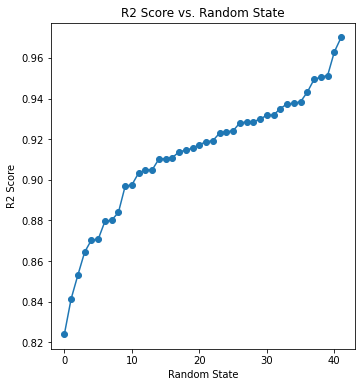

In [49]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(ranum, r2, marker='o')
plt.title('R2 Score vs. Random State')
plt.xlabel('Random State')
plt.ylabel('R2 Score')


In [46]:
print(r2_score(y_test,y_pred))


0.9187302424227023


In [45]:
print(lr.score(x_test,y_test))

0.9187302424227023


In [28]:
# 2. Random State Optimization: 
#  What is the effect of different random states on the performance of your single linear 
# regression model when splitting Fish.csv? 
df.corr()

,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507,-0.186034,-0.033240,0.310641,-0.261784,-0.337109,0.073625
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050,-0.205732,-0.037845,0.563514,-0.213250,-0.467420,0.050731
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547,-0.205957,-0.036090,0.552780,-0.218048,-0.479775,0.053777
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520,-0.198718,-0.105478,0.522894,-0.205072,-0.488397,0.052864
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881,-0.000547,-0.191405,-0.101810,-0.202076,-0.491731,0.048951
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000,-0.194147,0.144021,0.137722,-0.171465,-0.569018,0.124388
Species_Parkki,-0.186034,-0.205732,-0.205957,-0.198718,-0.000547,-0.194147,1.000000,-0.201021,-0.094329,-0.103413,-0.084712,-0.053988
Species_Perch,-0.033240,-0.037845,-0.036090,-0.105478,-0.191405,0.144021,-0.201021,1.000000,-0.255127,-0.279694,-0.229116,-0.146018
Species_Pike,0.310641,0.563514,0.552780,0.522894,-0.101810,0.137722,-0.094329,-0.255127,1.000000,-0.131247,-0.107513,-0.068519
Species_Roach,-0.261784,-0.213250,-0.218048,-0.205072,-0.202076,-0.171465,-0.103413,-0.279694,-0.131247,1.000000,-0.117866,-0.075117


In [30]:
x=df[['Length3']]
y=df['Weight']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.2)


In [31]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [47]:
y_pred=lr.predict(x_test)

In [58]:
print(r2_score(y_test,y_pred))
print(mse)
min(mse)

0.9187302424227023
[17086.81983198548, 12032.072402366639, 9782.736580407058, 11004.070885877707, 5543.458305963377, 15849.65517207386, 19197.28981686841, 7165.452948968112, 5687.7677647921955, 12083.92225909799, 6742.969102822786, 10458.760822410244, 15317.731317360096, 10196.651516931783, 7539.658474829312, 10358.310132347826, 8253.467471604086, 7151.329912063065, 9863.452387899395, 8003.670475273176, 10641.346482529963, 9516.597327791698, 18827.220804042452, 15799.531230697321, 18097.195295078036, 4247.76543742638, 13049.875120982908, 4480.436364020582, 10392.756785650694, 7342.123503274763, 12767.386973155206, 14789.067672150539, 8653.815006380824, 8081.375998329188, 6525.373562933909, 7611.3003369772505, 9761.122366005773, 12862.493209046945, 32546.141226813288, 5702.6927275651415, 10983.891811457957, 10678.223590742475]


4247.76543742638

In [ ]:
# Q-4 make a KNN model for fish.csv 
# 0. Feature Selection: 
#  select the relevant features from Fish.csv for your KNN model, considering the 
# columns Species, Weight, Length1, Length2, Length3, Height, and Width? 
# 1. Data Splitting: 
#  What steps are involved in splitting Fish.csv into training (80%) and testing (20%) sets 
# using a random state of 0.2? 
# 2. Model Training: 
#  How do you train a KNN model using the training set from Fish.csv? 
# 3. Prediction: 
#  How do you use a trained KNN model to predict the species of fish in the test set from 
# Fish.csv? 
# 4. Model Evaluation - Accuracy: 
#  What methods do you use to measure the accuracy of your KNN model on Fish.csv, 
# and how can you optimize the number of neighbors (k) to improve the model's 
# Performance? 
# 5. Model Evaluation - Confusion Matrix: 
#  What is a confusion matrix, and how can you use it to evaluate the performance of 
# your KNN model on the test set from Fish.csv? 
# 6. Model Optimization: 
#  How can you determine the optimal number of neighbors (k) for your KNN model 
# using Fish.csv, and what techniques can help in this optimization process? 
from sklearn.k

In [ ]:
# Q-5 Make a Decision Tree model for Fish.csv 
# 0. Feature Selection: 
#  select the features from Fish.csv for your Decision Tree model, considering the 
# columns Species, Weight, Length1, Length2, Length3, Height, and Width. 
# 1. Data Splitting: 
#  What steps are involved in splitting Fish.csv into training (80%) and testing (20%) sets 
# using a random state of 0.2? 
# 2. Model Training: 
#  How do you train a Decision Tree classifier using the training set from Fish.csv? 
# 3. Prediction: 
#  How do you use a trained Decision Tree classifier to predict the species of fish in the 
# test set from Fish.csv? 
# 4. Model Evaluation - Accuracy: 
#  What methods do you use to measure the accuracy of your Decision Tree classifier on 
# Fish.csv, and how can you optimize its performance? 
# 5. Model Evaluation - Confusion Matrix: 
#  : What is a confusion matrix, and how can you use it to evaluate the performance of 
# your Decision Tree classifier on the test set from Fish.csv? 
# 6. Model Optimization: 
#  How can you determine the optimal parameters (such as depth or split, etc.) for your 
# Decision Tree classifier using Fish.csv, and what techniques can help in this 
# optimization process?